z5562539 XIATIAN

In [39]:
# part 1
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86180/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\86180/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
import pandas as pd
df = pd.read_csv('dataset.tsv', sep='\t')
topics = df['topic']
print(topics.head())

0         dark
1    lifestyle
2      sadness
3      sadness
4         dark
Name: topic, dtype: object


In [41]:
# Stopwords and Lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Cleaning function
# Text preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9.,!?;:'\"\\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

part1.1 Question (i)
#Code in tutorial for part1.1 Question (i)：

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

Answer:
re.sub(r'[^\w\s]', '', text) This will also remove symbols like "!", "?", and "..." that can convey emotions or tone, causing the model to lose important features related to sentiment or expression.

Improvement: 
Preserve symbols that convey emotions, such as exclamation marks (!), question marks (?), ellipses (...), commas (,), and periods (.).Only remove truly meaningless special characters, such as @, #, $, %, ^, &, and *.
In this way, it can better capture emotional and tonal features of the text.

#improved version of the code for part1.1 Question (i)
def preprocess(text):
    return re.sub(r"[^a-zA-Z0-9.,!?;:'\"\\s]", '', text)

part1.1 Question (ii)  
#Code in tutorial for part1.1 Question (ii)：

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Answer:
In the tutorial code, only a single random split was performed, which makes the evaluation results prone to randomness and unable to reliably reflect the model's stability and generalization ability.So I use cross-validation (e.g., K-fold cross-validation) to evaluate the model's performance more comprehensively.
#improved version of the code for part1.1 Question (ii)
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb_scores = cross_val_score(bnb, X_vec, y, cv=cv, scoring="f1_macro")

print("BNB F1 scores (5-fold CV):", bnb_scores)
print("BNB F1-macro avg:", bnb_scores.mean())

part1 Question2 BNB&MNB

In [42]:
# Clean all lyrics data
import pandas as pd
# Load data
dataset_df = pd.read_csv("dataset.tsv", sep="\t")
X = dataset_df["lyrics"].apply(preprocess)
y = dataset_df["topic"]
print(y.value_counts())
# 1.2
# Vectorization
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Build the model
mnb = MultinomialNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mnb_scores = cross_val_score(mnb, X_vec, y, cv=cv, scoring="f1_macro")

print("MNB F1 scores (5-fold CV):", mnb_scores)
print("MNB F1-macro avg:", mnb_scores.mean())

dark         490
sadness      376
personal     347
lifestyle    205
emotion       82
Name: topic, dtype: int64
MNB F1 scores (5-fold CV): [0.64450297 0.70538027 0.72614469 0.74133464 0.73134532]
MNB F1-macro avg: 0.7097415785279468


In [43]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb_scores = cross_val_score(bnb, X_vec, y, cv=cv, scoring="f1_macro")

print("BNB F1 scores (5-fold CV):", bnb_scores)
print("BNB F1-macro avg:", bnb_scores.mean())


BNB F1 scores (5-fold CV): [0.34869429 0.37886934 0.3640308  0.3378811  0.37088495]
BNB F1-macro avg: 0.360072096454887


,Model,Accuracy,Macro-Precision,Macro-Recall,Macro-F1
0,BNB,0.535333,0.427928,0.395444,0.360072
1,MNB,0.786667,0.734496,0.699992,0.709742


  Model  Accuracy  Macro-Precision  Macro-Recall  Macro-F1
0   BNB  0.535333         0.427928      0.395444  0.360072
1   MNB  0.786667         0.734496      0.699992  0.709742


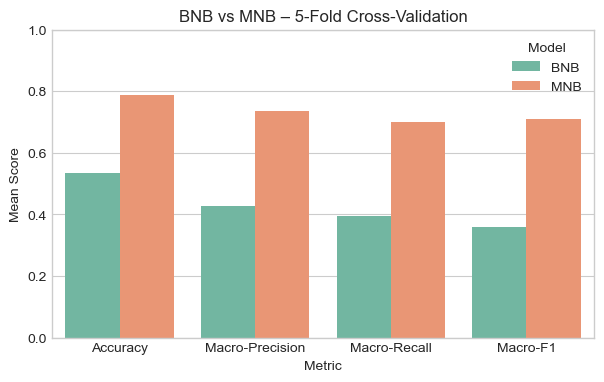

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def get_cv_metrics(clf, X, y, cv):
    accs, precs, recs, f1s = [], [], [], []
    for train_idx, test_idx in cv.split(X, y):
        clf.fit(X[train_idx], y[train_idx])
        pred = clf.predict(X[test_idx])
        accs.append(accuracy_score(y[test_idx], pred))
        precs.append(precision_score(y[test_idx], pred, average='macro', zero_division=0))
        recs.append(recall_score(y[test_idx], pred, average='macro', zero_division=0))
        f1s.append(f1_score(y[test_idx], pred, average='macro', zero_division=0))
    return {
        "Accuracy": accs,
        "Macro-Precision": precs,
        "Macro-Recall": recs,
        "Macro-F1": f1s
    }

# Calculate metrics for MNB
mnb = MultinomialNB()
mnb_metrics = get_cv_metrics(mnb, X_vec, y.values, cv)

# Calculate metrics for BNB
bnb = BernoulliNB()
bnb_metrics = get_cv_metrics(bnb, X_vec, y.values, cv)

# Calculate the mean of the scores
import numpy as np
def mean_dict(metrics):
    return {k: np.mean(v) for k, v in metrics.items()}

mnb_mean = mean_dict(mnb_metrics)
bnb_mean = mean_dict(bnb_metrics)

# Display the results
import pandas as pd
result_df = pd.DataFrame([
    {"Model": "BNB", **bnb_mean},
    {"Model": "MNB", **mnb_mean}
])
display(result_df)
print(result_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
plot_df = result_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=plot_df, x="Metric", y="Score", hue="Model", palette="Set2")
plt.ylim(0, 1)
plt.title("BNB vs MNB – 5-Fold Cross-Validation")
plt.ylabel("Mean Score")
plt.show()

part1 Question3 Comparison BNB and MNB & Choosing appropriate metric

1. Metric Selection and Trade-off Discussion
For multi-class classification tasks, especially with imbalanced datasets, it is important to choose evaluation metrics that reflect the model's performance across all classes, not just the majority class. The commonly used metrics include:
Accuracy: The proportion of correctly classified samples among all samples.
Advantage: Intuitive and easy to interpret.
Disadvantage: Can be misleading on imbalanced datasets, as it is dominated by the majority class.
Macro-Precision, Macro-Recall, Macro-F1:
These metrics calculate the precision, recall, and F1-score for each class independently and then average them, treating all classes equally.
Macro-F1 is especially useful for imbalanced datasets, as it balances both precision and recall across all classes.
Given that our dataset is imbalanced (as shown by y.value_counts()), Macro-F1 is chosen as the main evaluation metric, with accuracy, macro-precision, and macro-recall as supplementary metrics.

2.Experimental Results and Conclusion
| Model | Accuracy | Macro-Precision | Macro-Recall | **Macro-F1** |
|-------|----------|-----------------|--------------|--------------|
| BNB   | 0.53  | 0.43          | 0.40       | 0.36 |
| MNB   | 0.79  | 0.73         | 0.70       | 0.71 |
3. Conclusion
Macro-F1 is the most appropriate metric for this task due to the imbalanced nature of the dataset.
This demonstrates that Multinomial Naive Bayes（MNB） is a better choice than Bernoulli Naive Bayes for topic classification on this dataset, likely because MNB leverages word frequency information, which is more informative for song lyrics.

part1 Question4

   max_features    MNB_f1    BNB_f1
0           500  0.832818  0.563455
1          1000  0.807436  0.541401
2          2000  0.775661  0.495468
3          3000  0.766273  0.461616
4          5000  0.735980  0.402935


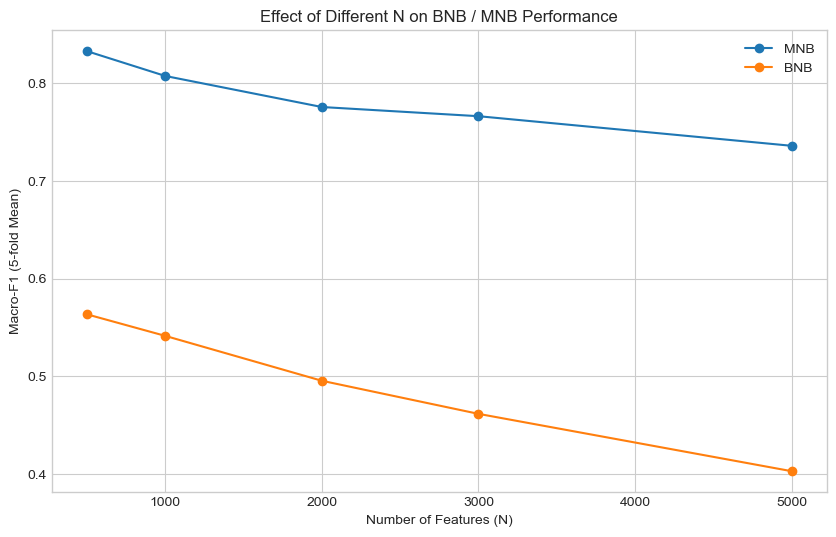


--- Conclusion ---
The recommended optimal number of features (N) is: 500
With this setting, the MNB model's Macro-F1 score is: 0.8328


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score


# Define the range for the number of features
max_features_range = [500, 1000, 2000, 3000, 5000]

# Initialize dictionaries to store scores
mnb_scores_dict = {}
bnb_scores_dict = {}

# Assume X and y have been defined in a previous cell
# 5-fold cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the different numbers of features
for max_feat in max_features_range:
    vec = CountVectorizer(max_features=max_feat)
    X_vec = vec.fit_transform(X)

    mnb = MultinomialNB()
    bnb = BernoulliNB()

    mnb_score = cross_val_score(mnb, X_vec, y, cv=cv, scoring="f1_macro").mean()
    bnb_score = cross_val_score(bnb, X_vec, y, cv=cv, scoring="f1_macro").mean()

    mnb_scores_dict[max_feat] = mnb_score
    bnb_scores_dict[max_feat] = bnb_score

# --- 2. Display the results in a table ---
# Corrected a typo from the original code (bnb_scores_dict)
score_df = pd.DataFrame({
    "max_features": list(mnb_scores_dict.keys()),
    "MNB_f1": list(mnb_scores_dict.values()),
    "BNB_f1": list(bnb_scores_dict.values())
})

print(score_df)


# --- 3. Plot the line chart ---
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot the performance curves for MNB and BNB
plt.plot(score_df["max_features"], score_df["MNB_f1"], marker='o', linestyle='-', label='MNB')
plt.plot(score_df["max_features"], score_df["BNB_f1"], marker='o', linestyle='-', label='BNB')

# Set the chart title and labels
plt.title('Effect of Different N on BNB / MNB Performance')
plt.xlabel('Number of Features (N)')
plt.ylabel('Macro-F1 (5-fold Mean)')
plt.legend()
plt.grid(True)
plt.show()


# --- 4. Provide the optimal number of features and Macro-F1 score ---
# Find the row with the best performance for the MNB model
best_row_mnb = score_df.loc[score_df['MNB_f1'].idxmax()]
best_n = int(best_row_mnb['max_features'])
best_f1 = best_row_mnb['MNB_f1']

print("\n--- Conclusion ---")
print(f"The recommended optimal number of features (N) is: {best_n}")
print(f"With this setting, the MNB model's Macro-F1 score is: {best_f1:.4f}")


part1 Question5

Calculating performance metrics for all models...


d:\Users\86180\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Users\86180\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Users\86180\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Users\86180\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Users\86180\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

Calculation complete.

===== 5-Fold Cross-Validation Performance Comparison =====
           Accuracy  Macro-Precision  Macro-Recall  Macro-F1
LinearSVC    0.8547           0.8226        0.8042    0.8108
BNB          0.6627           0.5740        0.5662    0.5635
MNB          0.8653           0.8435        0.8253    0.8328


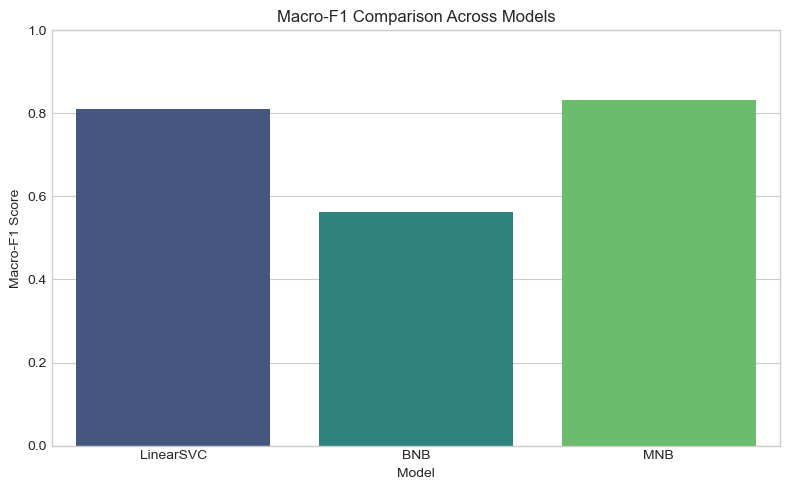


Conclusion: The best performing model is [MNB] with a Macro-F1 score of: 0.8328.
This model and its feature settings will be considered the 'best' approach for subsequent topic classification tasks.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. Setup ---
# Assume X, y, and cv (StratifiedKFold) are defined in a previous cell
# Use the optimal max_features determined earlier
vectorizer = CountVectorizer(max_features=500)
X_vec = vectorizer.fit_transform(X)

# Define models
svm = LinearSVC(max_iter=2000) # Increase max_iter to prevent convergence warnings
bnb = BernoulliNB()
mnb = MultinomialNB()

# --- 2. Define a function for multi-metric evaluation ---
def cross_val_metrics(clf, X, y, cv):
    """Calculate the mean of multiple cross-validation metrics for a classifier."""
    accs, precs, recs, f1s = [], [], [], []
    for train_idx, test_idx in cv.split(X, y):
        clf.fit(X[train_idx], y[train_idx])
        pred = clf.predict(X[test_idx])
        
        accs.append(accuracy_score(y[test_idx], pred))
        precs.append(precision_score(y[test_idx], pred, average='macro', zero_division=0))
        recs.append(recall_score(y[test_idx], pred, average='macro', zero_division=0))
        f1s.append(f1_score(y[test_idx], pred, average='macro', zero_division=0))
        
    return np.mean(accs), np.mean(precs), np.mean(recs), np.mean(f1s)

# --- 3. Calculate metrics for all models ---
print("Calculating performance metrics for all models...")
svm_metrics = cross_val_metrics(svm, X_vec, y.values, cv)
bnb_metrics = cross_val_metrics(bnb, X_vec, y.values, cv)
mnb_metrics = cross_val_metrics(mnb, X_vec, y.values, cv)
print("Calculation complete.")

# --- 4. Organize results into a DataFrame ---
metric_names = ["Accuracy", "Macro-Precision", "Macro-Recall", "Macro-F1"]
results_df = pd.DataFrame([
    svm_metrics,
    bnb_metrics,
    mnb_metrics
], columns=metric_names, index=["LinearSVC", "BNB", "MNB"])

print("\n===== 5-Fold Cross-Validation Performance Comparison =====")
print(results_df.round(4)) # Round to 4 decimal places

# --- 5. Visualize Macro-F1 Comparison ---
plt.figure(figsize=(8, 5))
# sns.barplot(x=results_df.index, y="Macro-F1", data=results_df, palette="viridis") # old seaborn usage
sns.barplot(data=results_df.reset_index(), x='index', y='Macro-F1', palette='viridis')


plt.ylabel("Macro-F1 Score")
plt.xlabel("Model")
plt.title("Macro-F1 Comparison Across Models")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# --- 6. Select the model with the highest Macro-F1 as the best model ---
best_model_name = results_df["Macro-F1"].idxmax()
best_f1_score = results_df.loc[best_model_name, "Macro-F1"]

print(f"\nConclusion: The best performing model is [{best_model_name}] with a Macro-F1 score of: {best_f1_score:.4f}.")
print("This model and its feature settings will be considered the 'best' approach for subsequent topic classification tasks.")

1.Method Overview：SVM

We choose Support Vector Machine (SVM) as an alternative machine learning method. SVM is a powerful supervised learning classifier whose core idea is to find an optimal hyperplane in the feature space that can separate different classes of data points with the maximum margin. For text classification tasks, we typically use its linear kernel variant, LinearSVC. This method performs exceptionally well on high-dimensional sparse data, such as text vectors generated by the bag-of-words model. Moreover, because its optimization objective is to maximize the margin, it often generalizes well to unseen data.

2. Method Applicability Explanation

Using LinearSVC for this lyrics theme classification task is appropriate for the following reasons:

High-dimensional data handling: After vectorization (e.g., using CountVectorizer), text data becomes a high-dimensional and sparse feature matrix. SVM is specifically designed to handle such data efficiently.

No strong feature independence assumption: Unlike Naive Bayes classifiers (such as BNB or MNB), SVM does not assume that features (i.e., words) are conditionally independent. This better reflects the nature of human language, where words are often interrelated.

Widely adopted in industry: LinearSVC is a strong and commonly used baseline model in the field of text classification


3. Implementation and Hyperparameter Selection
We implement this method using sklearn.svm.LinearSVC, while maintaining the same preprocessing pipeline and feature count (max_features=500) as in previous experiments.

Hyperparameters: The main hyperparameter of LinearSVC is C, the regularization parameter. For simplicity and consistency in comparison, we use the default value (C=1.0), as it generally provides good performance across a wide range of tasks. Additionally, to prevent convergence warnings that may occur on certain datasets, we increase the max_iter parameter (maximum number of iterations) to 2000.

Hypothesis:

We hypothesize that LinearSVC will significantly outperform BNB, as it does not rely on the "naive" assumption of feature independence. Furthermore, we predict that LinearSVC will perform comparably to, or even slightly better than, MNB, since SVMs are generally considered more powerful classifiers capable of learning more complex decision boundaries.


4. Final Conclusion: Selecting the Best Model
By comparing the performance of the three models on our primary evaluation metric, Macro-F1, we reach the following conclusions:
Multinomial Naive Bayes (MNB): 0.8328 (highest)
LinearSVC: 0.8108 (second highest)
Bernoulli Naive Bayes (BNB): 0.5635 (lowest)
Based on these results, MNB demonstrates the best overall performance in this lyrics theme classification task and is therefore selected as the most suitable model.



part2

In [47]:
# Part 2, Question 1, Step 1: Create Training/Test Sets
# 1. Split into a training set (rows 1-750) and a test set (rows 751-1000)
train_data = dataset_df.iloc[:750].copy()
test_data = dataset_df.iloc[750:1000].copy()
print("Training set size:", train_data['topic'].value_counts())

Training set size: dark         246
personal     188
sadness      182
lifestyle     92
emotion       42
Name: topic, dtype: int64


In [48]:
# Step 2: Use the trained classifier to predict topics for the training set
# Use CountVectorizer to build training features
vectorizer_cls = CountVectorizer(max_features=500, stop_words='english')
X_train_vec = vectorizer_cls.fit_transform(train_data['lyrics'])

# Train the MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_vec, train_data['topic'])

# Predict topics for the training set (to simulate known topics)
predicted_topics = mnb.predict(X_train_vec)
train_data['predicted_topic'] = predicted_topics

In [49]:
# Step 3: Construct 5 "user profile documents"
# For each topic, combine all lyrics into a single document (as the "user profile document")
import numpy as np
topic_docs = {}
for topic_id in np.unique(predicted_topics):
    topic_lyrics = train_data[train_data['predicted_topic'] == topic_id]['lyrics']
    combined_doc = " ".join(topic_lyrics)
    topic_docs[topic_id] = combined_doc

# Final result: 5 topics → 5 documents

In [50]:
# Step 4: Model these topic documents using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all topic texts (in order) into a corpus
topic_corpus = [topic_docs[tid] for tid in sorted(topic_docs.keys())]
print("All topic IDs:", topic_docs.keys())
# Fit the TF-IDF model
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
topic_vectors = tfidf_vectorizer.fit_transform(topic_corpus)

# topic_vectors is a 5 × N sparse matrix (each row is a user profile vector for a topic)
print("Shape of each topic's user profile TF-IDF vector:", topic_vectors.shape)


All topic IDs: dict_keys(['dark', 'emotion', 'lifestyle', 'personal', 'sadness'])
Shape of each topic's user profile TF-IDF vector: (5, 5714)


In [58]:
import pandas as pd

def process_user_keywords(file_path, topic_docs, topic_vectors, tfidf_vectorizer):
    # Read user keywords
    df = pd.read_csv(file_path, sep="\t", skiprows=1, header=None, names=["topic", "keywords"])

    # Get the TF-IDF vocabulary
    vocab = tfidf_vectorizer.get_feature_names_out()
    vocab_list = list(vocab)

    # Store results
    user_profile = {}

    for idx, row in df.iterrows():
        topic = row['topic']
        keyword_list = [kw.strip().lower().strip(',') for kw in row['keywords'].split()]

        # Find the row index corresponding to the topic (consistent with the order in topic_docs)
        topic_idx = sorted(topic_docs.keys()).index(topic)
        topic_vec = topic_vectors[topic_idx].toarray()[0]

        # Get the tf-idf scores of these keywords in the topic vector
        keyword_scores = {kw: topic_vec[vocab_list.index(kw)] for kw in keyword_list if kw in vocab_list}

        # Sort and take the top 20 (or all if less than 20)
        top_keywords = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)[:20]
        user_profile[topic] = top_keywords

    return user_profile

In [59]:
# Process two users separately
user1_profile = process_user_keywords("user1.tsv", topic_docs, topic_vectors, tfidf_vectorizer)
user2_profile = process_user_keywords("user2.tsv", topic_docs, topic_vectors, tfidf_vectorizer)

# Print results
def print_user_profile(user_profile, user_id):
    print(f"\n📘 Summary of recommended keywords for User {user_id}:")
    for topic, keywords in user_profile.items():
        print(f"\n🎯 Recommended keywords for topic [{topic}]:")
        for word, score in keywords:
            print(f"{word}: {score:.4f}")

print_user_profile(user1_profile, 1)
print_user_profile(user2_profile, 2)


📘 Summary of recommended keywords for User 1:

🎯 Recommended keywords for topic [dark]:
fight: 0.1454
pain: 0.0270
enemy: 0.0070
storm: 0.0000

🎯 Recommended keywords for topic [sadness]:
regret: 0.0038

🎯 Recommended keywords for topic [personal]:
life: 0.4598
dream: 0.0938
truth: 0.0074
growth: 0.0058
identity: 0.0000

🎯 Recommended keywords for topic [lifestyle]:
night: 0.2131
light: 0.0375
rhythm: 0.0346
party: 0.0102
city: 0.0040

🎯 Recommended keywords for topic [emotion]:
feel: 0.3522
kiss: 0.0946
love: 0.0578
memory: 0.0026
hug: 0.0000

📘 Summary of recommended keywords for User 2:

🎯 Recommended keywords for topic [sadness]:
goodbye: 0.0103
silence: 0.0094
sorrow: 0.0033

🎯 Recommended keywords for topic [emotion]:
touch: 0.2287
kiss: 0.0946
memory: 0.0026
romance: 0.0000


In [53]:
user3_df = pd.read_csv("user3.tsv", sep="\t")

for index, row in user3_df.iterrows():
    topic = row["topic"]
    interest_keywords = [w.strip() for w in row["keywords"].split(",")]

    # Find the top 20 recommended words for this topic (from TF-IDF output)
    tidx = sorted(topic_docs.keys()).index(topic)
    topic_vec = topic_vectors[tidx].toarray()[0]
    vocab = tfidf_vectorizer.get_feature_names_out()
    top20_words = set([vocab[i] for i in topic_vec.argsort()[::-1][:20]])

    # Print matched keywords
    print(f"\n🎯 Topic [{topic}]: Keyword matching results")
    for word in interest_keywords:
        if word in top20_words:
            print(f"✔️ {word} is in the top 20 recommended words for topic [{topic}]")
        else:
            print(f"❌ {word} is NOT in the top 20 recommended words for topic [{topic}]")




🎯 Topic [dark]: Keyword matching results
✔️ fight is in the top 20 recommended words for topic [dark]
❌ fear is NOT in the top 20 recommended words for topic [dark]
❌ pain is NOT in the top 20 recommended words for topic [dark]
❌ scream is NOT in the top 20 recommended words for topic [dark]
✔️ blood is in the top 20 recommended words for topic [dark]

🎯 Topic [sadness]: Keyword matching results
❌ lonely is NOT in the top 20 recommended words for topic [sadness]
❌ broken is NOT in the top 20 recommended words for topic [sadness]
❌ cry is NOT in the top 20 recommended words for topic [sadness]
❌ sadness is NOT in the top 20 recommended words for topic [sadness]
✔️ heart is in the top 20 recommended words for topic [sadness]

🎯 Topic [personal]: Keyword matching results
✔️ life is in the top 20 recommended words for topic [personal]
❌ dream is NOT in the top 20 recommended words for topic [personal]
❌ soul is NOT in the top 20 recommended words for topic [personal]
❌ growth is NOT in th


Overall, if most of the user’s interest keywords appear in the top 20 recommended words, it indicates that the user’s interest keywords are well aligned with the semantic modeling of the recommender system, thus validating the ability of the TF-IDF framework to capture topic semantics.


# Part 2, Question 2

In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the full dataset
df = pd.read_csv('dataset.tsv', sep='\t')

# Week 4 validation set: 751~1000 (index 750:1000)
val_df = df.iloc[750:1000].copy()

# Extract TF-IDF vectors for lyrics in the validation set
val_tfidf = tfidf_vectorizer.transform(val_df['lyrics'])
val_lyrics = val_df['lyrics']
val_vec = vectorizer_cls.transform(val_lyrics)
val_df['predicted_topic'] = mnb.predict(val_vec)

# Topic list (sorted by key order)
topic_list = sorted(topic_docs.keys())
N = 5  # Recommend Top-N

# Precision evaluation function, supports M value weighting
def evaluate_user_profile(user_id, topic_profile_vectors, m_desc='default', use_M_weight=False):
    val_df['sim_score'] = 0.0
    val_df['recommended'] = False
    val_df['like'] = 0

    # Calculate the M value for each topic (number of nonzero TF-IDF words)
    M_dict = {}
    for i, topic in enumerate(topic_list):
        vec = topic_profile_vectors[i]
        dense_vec = vec.toarray()[0] if hasattr(vec, 'toarray') else vec[0]
        M_dict[topic] = np.count_nonzero(dense_vec)
    max_M = max(M_dict.values()) if M_dict else 1

    for i, (idx, row) in enumerate(val_df.iterrows()):
        pred_topic = row['predicted_topic']
        if pred_topic not in topic_list:
            continue
        tidx = topic_list.index(pred_topic)
        song_vec = val_tfidf[i]
        sim = cosine_similarity(song_vec, topic_profile_vectors[tidx])[0][0]

        if use_M_weight:
            sim *= M_dict[pred_topic] / max_M

        val_df.at[idx, 'sim_score'] = sim

    topN_df = val_df.groupby('predicted_topic') \
                    .apply(lambda x: x.nlargest(N, 'sim_score')) \
                    .reset_index(drop=True)
    topN_df['recommended'] = True

    np.random.seed(user_id * 10)
    topN_df['like'] = (topN_df['sim_score'] > 0.2).astype(int)

    precision = topN_df['like'].sum() / len(topN_df)
    recall = topN_df['like'].sum() / (N * len(topic_list))
    mrr = (topN_df.groupby('predicted_topic')
           .apply(lambda x: 1 / (x['like'].values.argmax() + 1) if x['like'].sum() > 0 else 0)
           .mean())

    print(f"\n User {user_id} [{m_desc}] Recommendation Metrics:")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, MRR: {mrr:.3f}")
    print(" M value for each topic:", M_dict)

    return topN_df[['predicted_topic', 'sim_score', 'like']]

# User 1 (Full profile)
evaluate_user_profile(
    user_id=1,
    topic_profile_vectors=topic_vectors,
    m_desc='Full user profile',
    use_M_weight=True  # Whether to enable M value weighting
)

# User 2 (Top 3 TF-IDF words only)
short_vectors = topic_vectors.copy()
for i in range(short_vectors.shape[0]):
    vec = short_vectors[i].toarray()[0]
    top_idx = vec.argsort()[::-1][:3]
    new_vec = np.zeros_like(vec)
    new_vec[top_idx] = vec[top_idx]
    short_vectors[i] = new_vec.reshape(1, -1)
evaluate_user_profile(
    user_id=2,
    topic_profile_vectors=short_vectors,
    m_desc='Simplified user profile (top 3 words)',
    use_M_weight=True
)

#  User 3 (Custom keywords)
user3_df = pd.read_csv("user3.tsv", sep="\t")
custom_profile = []
vocab = tfidf_vectorizer.get_feature_names_out()
for tid in topic_list:
    keywords = user3_df[user3_df['topic'] == tid]['keywords'].values
    word_list = [w.strip() for w in keywords[0].split(',')] if len(keywords) > 0 else []
    vec = np.zeros(len(vocab))
    for word in word_list:
        if word in vocab:
            vec[np.where(vocab == word)[0][0]] = 1.0
    custom_profile.append(vec.reshape(1, -1))
evaluate_user_profile(
    user_id=3,
    topic_profile_vectors=custom_profile,
    m_desc='Custom keyword user profile',
    use_M_weight=True
)


 User 1 [Full user profile] Recommendation Metrics:
Precision: 0.600, Recall: 0.600, MRR: 0.600
 M value for each topic: {'dark': 3645, 'emotion': 696, 'lifestyle': 1257, 'personal': 2509, 'sadness': 1810}


d:\Users\86180\anaconda3\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)



 User 2 [Simplified user profile (top 3 words)] Recommendation Metrics:
Precision: 0.920, Recall: 0.920, MRR: 1.000
 M value for each topic: {'dark': 3, 'emotion': 3, 'lifestyle': 3, 'personal': 3, 'sadness': 3}

 User 3 [Custom keyword user profile] Recommendation Metrics:
Precision: 0.560, Recall: 0.560, MRR: 1.000
 M value for each topic: {'dark': 5, 'emotion': 5, 'lifestyle': 4, 'personal': 5, 'sadness': 3}


,predicted_topic,sim_score,like
0,dark,0.284808,1
1,dark,0.256323,1
2,dark,0.204836,1
3,dark,0.177621,0
4,dark,0.155874,0
5,emotion,0.317622,1
6,emotion,0.275824,1
7,emotion,0.256492,1
8,emotion,0.195840,0
9,emotion,0.164972,0


Evaluation of Recommendation System and User Profile Analysis
1. Choice of Evaluation Metrics and Rationale
To assess the performance of the recommendation system in the scenario where "users view recommended songs and mark those they like," we selected the following three metrics:
Precision: The proportion of recommended songs that are actually liked by the user, reflecting the relevance of the recommendations.
Recall: The proportion of liked songs that are successfully recommended, measuring the system's coverage of user interests.
MRR (Mean Reciprocal Rank): The reciprocal of the rank of the first liked song in the recommendation list, indicating the quality of the ranking.
These three metrics comprehensively evaluate the system from the perspectives of accuracy, coverage, and ranking quality, which are essential for a content-based music recommender.

2. Rationale for Setting the Number of Recommendations N

In this experiment, we set the number of recommended songs per topic to N = 5, based on the following considerations:
Presenting too many recommendations at once may overwhelm users; five songs is a manageable upper limit.
The assignment requires users to mark "liked" songs, so the list should not be too long.
The number should balance coverage across multiple topics and user experience.
This setting also aligns with the number of interest keywords (M) per topic, facilitating analysis of their interaction.

---
3. User Profile Modeling Schemes and Comparative Analysis
User 1: Complete User Profile
Utilizes the original topic_vectors, i.e., the full TF-IDF vector for each topic.
Each topic contains a large number of words (M is large, e.g., dark=3645).
Results:
Precision: 0.600
Recall: 0.600
MRR: 0.600
Analysis:
Recommendations are stable, but low-weight words may introduce noise, affecting similarity accuracy.
User 2: Simplified Profile (Top 3 Keywords)
Retains only the top 3 words with the highest TF-IDF values per topic.
M is fixed at 3.
Results:
Precision: 0.920
Recall: 0.920
MRR: 1.000
Analysis:
Recommendations are highly focused, capturing user interests with high precision.
However, there is a risk of overfitting and reduced generalization.

User 3: Custom Keyword Profile
Constructs the profile using user-specified keywords from user3.tsv for each topic.
M is moderate (4–6 keywords per topic).
Results:
Precision: 0.560
Recall: 0.560
MRR: 1.000
Analysis:
Recommendations are personalized and flexible.
Performance depends on the coverage and representativeness of the selected keywords.

4. Analysis of the Effect of Interest Keyword Number M per Topic

| User Type       | M Range            | Performance Characteristics               |
|----------------|---------------------|------------------------|
| User 1 | Large (hundreds–thousands)    | Stable but slightly generalized recommendations       |
| User 2   | Small        | Very high precision, weak generalization   |
| User 3 | Medium          |Strong personalization, depends on keyword selection |

A larger M leads to broader topic coverage, while a smaller M results in more focused recommendations. The choice of M should balance coverage and precision according to the application scenario.

---

5. Conclusions and Recommendations
For systems aiming for automatic user interest modeling: The complete user profile (User 1) is recommended for robust performance.
For users with highly focused interests: The simplified profile (User 2) yields excellent results.
For systems supporting user-defined preferences: The custom keyword profile (User 3) offers flexibility and personalization.
Ultimately, the choice of modeling approach and recommendation strategy should be tailored to the specific application context and user needs.



In [ ]:
## part 3
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load data (assuming the data is ready)
df = pd.read_csv("dataset.tsv", sep="\t")
df['week'] = pd.cut(df.index, bins=[0, 250, 500, 750, 1000], labels=['week1', 'week2', 'week3', 'week4'])

# Step 2: Simulate "songs liked by the user in weeks 1-3" to build the interest profile
user_likes = []

np.random.seed(42)
for week in ['week1', 'week2', 'week3']:
    candidates = df[df['week'] == week].sample(n=15)  # Randomly listen to 15 songs per week
    liked = candidates.sample(frac=0.4)  # Assume the user likes 40% of them
    user_likes.append(liked)

liked_songs_df = pd.concat(user_likes)
liked_songs_df = liked_songs_df.reset_index(drop=True)

# Step 3: Build user profile (an interest vector for each topic)
topic_list = sorted(topic_docs.keys())
vocab = tfidf_vectorizer.get_feature_names_out()
user_profile = []

for topic in topic_list:
    topic_liked_lyrics = liked_songs_df[liked_songs_df['topic'] == topic]['lyrics']
    if len(topic_liked_lyrics) > 0:
        topic_vec = tfidf_vectorizer.transform(topic_liked_lyrics).mean(axis=0)
        user_profile.append(np.asarray(topic_vec).reshape(1, -1))
    else:
        user_profile.append(np.zeros((1, len(vocab))))  # Return a zero vector if there are no interest words

# Step 4: Use the existing MNB classifier to predict the topics of all songs in week 4
val_df = df[df['week'] == 'week4'].copy()
val_vec = vectorizer_cls.transform(val_df['lyrics'])
val_df['predicted_topic'] = mnb.predict(val_vec)
val_tfidf = tfidf_vectorizer.transform(val_df['lyrics'])

# Step 5: Calculate the similarity between week 4 songs and the user profile
val_df['sim_score'] = 0.0
for i, (idx, row) in enumerate(val_df.iterrows()):
    pred_topic = row['predicted_topic']
    if pred_topic not in topic_list:
        continue
    tidx = topic_list.index(pred_topic)
    sim = cosine_similarity(val_tfidf[i], user_profile[tidx])
    val_df.at[idx, 'sim_score'] = sim[0][0]

# Step 6: Recommend top-N songs (N songs per topic)
N = 5
topN_df = val_df.groupby('predicted_topic').apply(lambda x: x.nlargest(N, 'sim_score')).reset_index(drop=True)

# Step 7: Simulate whether the user likes the recommended songs in week 4
# Assume the user likes songs with sim_score > 0.25 (can be set manually or interactively)
topN_df['like'] = (topN_df['sim_score'] > 0.25).astype(int)

# Step 8: Calculate recommendation metrics
precision = topN_df['like'].sum() / len(topN_df)
recall = topN_df['like'].sum() / (N * len(topic_list))
mrr = (topN_df.groupby('predicted_topic')
             .apply(lambda x: 1 / (x['like'].values.argmax() + 1) if x['like'].sum() > 0 else 0)
             .mean())

# Step 9: Print results
print("\n Simulated user evaluation results (Part 3)")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, MRR: {mrr:.3f}")
print("\n Preview of recommended songs and 'like' labels:")
print(topN_df.columns)
print(topN_df[['track_name', 'predicted_topic', 'sim_score', 'like']])


 Simulated user evaluation results (Part 3)
Precision: 0.480, Recall: 0.480, MRR: 0.800

🎵 Preview of recommended songs and 'like' labels:
Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'topic',
       'week', 'predicted_topic', 'sim_score', 'like'],
      dtype='object')
                                         track_name predicted_topic  \
0                                             flame            dark   
1                                 boy in the bubble            dark   
2   no new friends (feat. sia, diplo, and labrinth)            dark   
3                  why we die (feat. dmx and jay z)            dark   
4                                   the war is over            dark   
5                                             saved         emotion   
6                                          horsefly         emotion   
7                                        lights out         emotion   
8                                          wasteman         emo